In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy import stats 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
drug_data = "data/mouse_drug_data.csv"
tumor_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
tumor_data_df = pd.read_csv("data/clinicaltrial_data.csv")
tumor_data_df.head()

drug_data_df = pd.read_csv("data/mouse_drug_data.csv")
drug_data_df.head()

# Combine the data into a single dataset
# Display the data table for preview
all_trial_data_df = pd.merge(tumor_data_df, drug_data_df, on='Mouse ID')
all_trial_data_df.head() # Merging the dataset



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

avg_volume = pd.DataFrame(all_trial_data_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
volume_se = pd.DataFrame(all_trial_data_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])


# Arranging of avg tumor volume data
avg_volume = avg_volume.unstack(level = 0)
avg_volume.columns = avg_volume.columns.get_level_values(1)
avg_volume



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
volume_se = volume_se.unstack(level=0)


In [4]:
# Convert to DataFrame
volume_se.columns = volume_se.columns.get_level_values(1)
# Preview DataFrame
volume_se



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [5]:
# Minor Data Munging to Re-Format the Data Frames

In [6]:


# Preview that Reformatting worked


IndexError: list index out of range

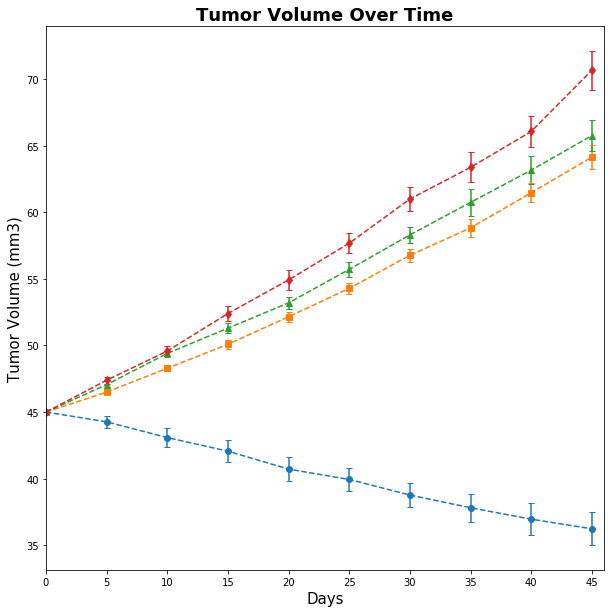

In [57]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, avg_volume.index.max()+3 , 5)) # location of separators for timepoint
plt.xlim(0, avg_volume.index.max() + 1) 

#markers used throughout 
markers = ['o', 's', '^', 'd']

# independent variable
xvals = avg_volume.index #timepoints

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for c in avg_volume.columns:
    plt.errorbar(xvals, 
                 avg_volume[c], 
                 volume_se[c], #std error
                 linestyle = '--', 
                 marker = markers[count], 
                 capthick = 1, # for caps on error bars 
                 capsize = 3)  # for caps on error bars
    count += 1

#legend options
lg = plt.legend(numpoints = 2, # shows two symbols in legend
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)
plt.show()





In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

IndexError: list index out of range

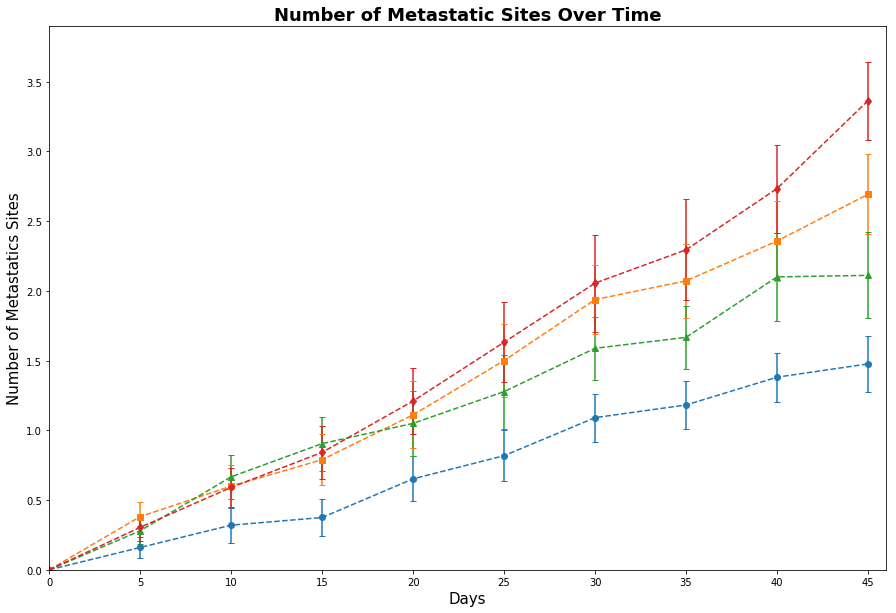

In [64]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avg_num_spread = pd.DataFrame(all_trial_data_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
avg_spread_err = pd.DataFrame(all_trial_data_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])


#reshaping of metastatic site data
avg_num_spread = avg_num_spread.unstack(level = 0)
avg_num_spread.columns = avg_num_spread.columns.get_level_values(level = 1)
avg_num_spread

#reshaping of metastatic data - std error
avg_spread_err = avg_spread_err.unstack(level = 0)
avg_spread_err.columns = avg_spread_err.columns.get_level_values(level = 1)
avg_spread_err

plt.figure(figsize = (15,10))
plt.title('Number of Metastatic Sites Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Number of Metastatics Sites', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0,avg_num_spread.index.max() + 3 ,5))
plt.xlim(0, avg_num_spread.index.max()+1)
plt.ylim(0, avg_num_spread.max().max() + avg_spread_err.max().max() + .1)


#creates plot for each treatment, using different markers for each

count = 0 
xvals = avg_num_spread.index #timepoints

for c in avg_num_spread:
    plt.errorbar(xvals, 
                 avg_num_spread[c], 
                 avg_spread_err[c], 
                 linestyle = '--', 
                 marker =  markers[count], #markers defined above
                 capthick = 1, 
                 capsize = 3)
    count += 1
    
#legend options
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)

plt.show()


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
mice_count = all_trial_data_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
mice_count = mice_count.unstack(level = 0)
mice_count


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


IndexError: list index out of range

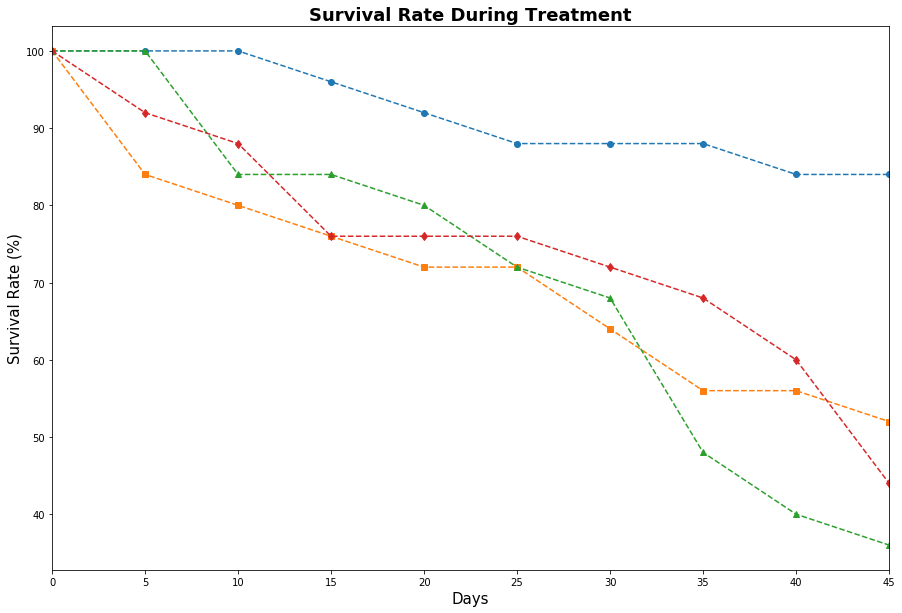

In [11]:
# Generate the Plot (Accounting for percentages)
#plot options
plt.figure(figsize = (15,10))
plt.title('Survival Rate During Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 15})
plt.xlim(0, mice_count.index.max())


xvals = mice_count.index #timepoints

count = 0 

for c in mice_count:
    yvals = mice_count[c]/mice_count.loc[0,c] * 100 #calculates survival rate for each timepoint
    plt.plot(xvals, 
             yvals, 
             linestyle = '--', 
             marker =  markers[count], #markers list from above
             )
    count += 1
    
#legend options
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)



# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [70]:
# Calculate the percent changes for each drug
# Display the data to confirm

tumor_change = (avg_volume.loc[45, :] - avg_volume.loc[0, :])/avg_volume.loc[0, :] * 100
tumor_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [106]:
all_trial_data_df = mice_count[['Capomulin','Infubinol','Ketapril', 'Placebo']]
# tumor_volume_change = pd.Series(d)
all_trial_data_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [72]:
drug = tumor_volume_change.keys()
drug

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object')

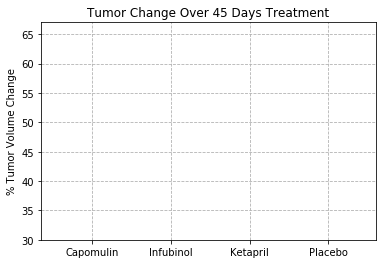

In [110]:
# Store all Relevant Percent Changes into a Tuple
# Orient widths. Add labels, tick marks, etc.
# plot options

ax = plt.subplot()
x_axis = np.arange(0, len(drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")

plt.xlim(-0.25, len(drug))
plt.ylim(30, max(tumor_change) + 10)
plt.grid(True, linestyle='dashed')

plt.xticks(tick_locations, drug)

width = 0.4
vals = [1,2,3,4,5]
colors = ['r','b','b','b','b']
# colors = []
for value in tumor_change:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')

        mice_count.plot.bar#(x_axis, tumor_change, color=colors, alpha=0.75, align="edge")



# def autolabel(percents, ax):

#     #(y_bottom, y_top) = ax.get_ylim()
#     #y_height = y_top - y_bottom
#     for percent in percents:
#         height = percent.get_height()
       
#         ax.text(percent.get_x()+ percent.get_width()/2., 0.5*height, '%d' % int(height) +"%", ha='center', 
#     va='center')

# autolabel(percents, ax)

# plt.show()

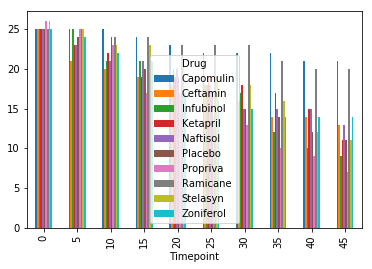

In [112]:
mice_count.plot.bar()

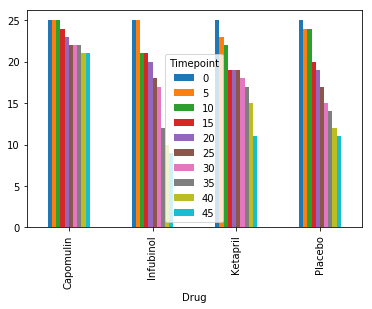

In [119]:
all_trial_data_df.T.plot.bar()